In [12]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o arquivo da rede

In [13]:
# Baixar o arquivo karate.gml do meu repositório no GitHub
!wget -O karate.gml https://raw.githubusercontent.com/gabrielxcosta/PCC121---Complex-Networks/main/Teoria%20dos%20Grafos/karate.gml

--2025-08-27 01:06:55--  https://raw.githubusercontent.com/gabrielxcosta/PCC121---Complex-Networks/main/Teoria%20dos%20Grafos/karate.gml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4194 (4.1K) [text/plain]
Saving to: ‘karate.gml’

karate.gml          100%[===================>]   4.10K  --.-KB/s    in 0s      

2025-08-27 01:06:56 (47.0 MB/s) - ‘karate.gml’ saved [4194/4194]



# Tarefa - Teoria dos Grafos
## PCC121 - Redes Complexas
Aluno: Gabriel F. Costa

Número de nós (N): 34
Número de links (L): 78
Grau médio (<k>): 4.59
Número máximo possível de arestas (L_max): 561.0
Diâmetro (d_max): 5


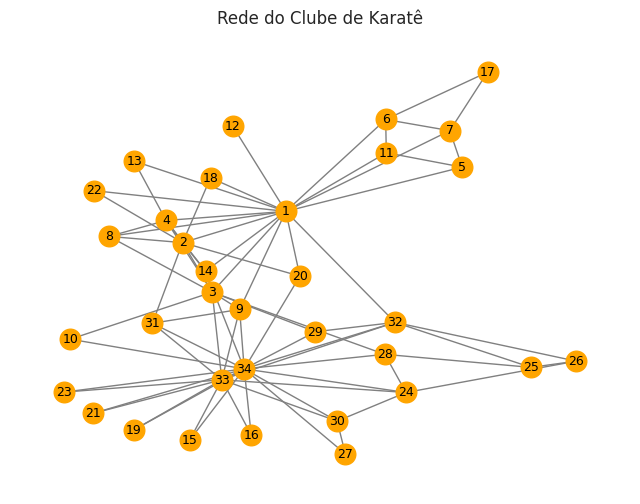

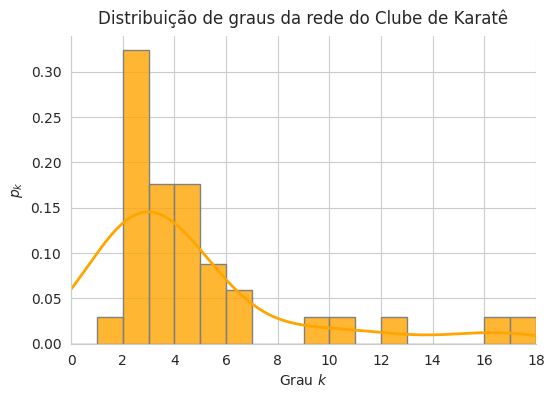

In [14]:
# %% ------------------------------------------------------------
# Análise da rede Karate com NetworkX
# %% ------------------------------------------------------------

# Carregar o arquivo GML usando os IDs dos nós
G = nx.read_gml('karate.gml', label='id')

# -------------------------
# 1. Calcular o necessário
# -------------------------
N = G.number_of_nodes()  # número de nós
L = G.number_of_edges()  # número de arestas
degrees = [d for n, d in G.degree()]
k_avg = sum(degrees) / N   # grau médio
L_max = N * (N - 1) / 2        # número máximo possível de arestas
d_max = nx.diameter(G)   # diâmetro da rede

# Imprimir resultados
print(f"Número de nós (N): {N}")
print(f"Número de links (L): {L}")
print(f"Grau médio (<k>): {k_avg:.2f}")
print(f"Número máximo possível de arestas (L_max): {L_max}")
print(f"Diâmetro (d_max): {d_max}")

# -------------------------
# 2. Plot da rede
# -------------------------
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)  # layout da rede
# Calcula a posição de cada nó no plano 2D usando o algoritmo spring_layout,
# que simula forças de atração (arestas como molas) e repulsão (nós como cargas),
# gerando uma visualização mais organizada/limpa do grafo.
# O parâmetro de semente seed=42 garante que o layout seja reproduzível em cada execução.
# Fonte: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

nx.draw_networkx(G, pos,
                 with_labels=True,
                 node_color='orange',
                 node_size=220,
                 font_size=9,
                 edge_color='gray')
plt.title("Rede do Clube de Karatê")
plt.axis('off')
plt.show()

# -------------------------
# 3. Distribuição de grau p_k
# -------------------------
# degrees: lista ou array com os graus dos nós
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')

# Histograma
sns.histplot(degrees, bins=range(0, max(degrees)+2), stat='probability', color='orange', edgecolor='gray', alpha=0.8)

# KDE sobreposta
sns.kdeplot(degrees, color='orange', linewidth=2)

plt.xlabel(r"Grau $k$")
plt.ylabel(r"$p_k$")
plt.title("Distribuição de graus da rede do Clube de Karatê", y=1.01)
plt.xlim(0, max(degrees)+1)
sns.despine()  # remove bordas superior e direita para estilo whitegrid
plt.show()